## Table of Contents
- [TO DO](#to-do)
- [Introduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Correlation Heatmap](#correlation-heatmap)
- [Translate Attempts](#translate-attempts)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Scratchpad??](#scratchpad??)
- [Decision Tree](#decision-tree)
- [Pipeline](#pipeline)
- [Conclusion](#conclusion)

## TO DO {#to-do}
### ML pipeline, clustering, hyperparameter tuning, grid search, gradient boost, cross-validation, neural networks
### Stretch goals: get translation working. integrate with ifixit datasets and/or API

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
kuzals@gmail.com
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods.


## Exploratory Data Analysis {#exploratory-data-analysis}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into a pandas dataframe using pd.read_csv()

In [164]:
df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

quick look at the first few rows of the dataset using .head()

In [18]:
df.head(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden
5,anstiftung_11544,anstiftung,DEU,Haushaltsgeräte ~ Wasserkocher,Kettle,14,Support Plus,2018.0,5.0,End of life,No way to open product,2711,2023-03-29,ohne Funktion
6,anstiftung_11545,anstiftung,DEU,Haushaltsgeräte ~ Handrührgerät,Food processor,37,Severin,2020.0,3.0,End of life,Spare parts too expensive,2711,2023-03-29,Läuft zu schnell
7,anstiftung_11546,anstiftung,DEU,Unterhaltungselektronik ~ Radio,Portable radio,23,Philips,1993.0,30.0,Repairable,NaN,2711,2023-03-29,Kasette spielt nicht


quick look some rows at random in the dataset using .sample()

In [19]:
df.sample(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
79121,restart_16307,The Restart Project,ITA,Lamp,Lamp,15,Unknown,2009.0,10.0,Repairable,NaN,Repair Cafe Pavia,2019-12-15,Doesn't switch on
73306,restart_15705,The Restart Project,GBR,Portable radio,Portable radio,23,Roberts,2009.0,10.0,Repairable,NaN,Restarters West London,2019-11-09,Won't tune
29748,rcint_49976,Repair Café International,NLD,Computer equipment / phones ~ Printer,Printer/scanner,25,Canon,2010.0,12.0,End of life,NaN,0036,2022-12-16,printkop zit vast printkop zit vast
102165,rcwales_6593,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Carmarthen,2022-07-09,"Very little suction, and dust not going throug..."
41790,rcint_27732,Repair Café International,NLD,Household appliances electric ~ Coffee maker,Coffee maker,36,Philips,NaN,NaN,End of life,NaN,0011,2020-01-11,kortsluiting boiler defect
14637,rcint_40221,Repair Café International,DEU,Household appliances electric ~ Iron,Iron,40,Siemens,2016.0,6.0,Fixed,NaN,0460,2022-11-05,"heizt einmalig auf , dann nicht mehr. Vermutet..."
48674,rcint_3321,Repair Café International,NLD,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,NAD,NaN,NaN,End of life,NaN,0011,2017-11-11,onbekend elektronisch probleem werkt niet
14457,rcint_45364,Repair Café International,DEU,Household appliances electric ~ Vacuum cleaner,Vacuum,34,Vorwerk,2000.0,22.0,Fixed,NaN,0195,2022-03-19,Bürste sitzt fest Büste sitzt fest Bürste demo...


quick look at the last few rows of the dataset using .tail() <br>
good to compare and contrast with the first few rows

In [20]:
df.tail(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
103068,rcwales_7496,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Unknown,NaN,NaN,End of life,Item too worn out,Mold,2022-10-30,Malfunction.
103069,rcwales_7497,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Bernina,NaN,NaN,Repairable,NaN,Mold,2022-10-30,It is stuck on buttonhole mode and is seized up.
103070,rcwales_7498,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Jones,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Unknown probably motor.
103071,rcwales_7499,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Permaplug,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Extension cable for PAT testing.
103072,rcwales_7500,Repair Cafe Wales,GBR,Electrical Item ~ Misc,Misc,18,Unknown,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Broken mirror.
103073,rcwales_7501,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Toyota,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Cotton reel spindle needs replacing.
103074,rcwales_7502,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Brother,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Bobbin not working.
103075,rcwales_7503,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Mold,2022-10-30,It doesn’t turn on.


In [176]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37117.000000,37117.000000
mean,23.369417,2008.472452,12.056543
std,10.205812,14.654064,14.560084
min,1.000000,1019.000000,-1.000000
25%,15.000000,2005.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,998.000000


A few things look out of place from these descriptive statistics: product_category_id is not really a numerical value and should be converted. The column year_of_manufacture has roughly 37,000 entries but is missing 70,000 values. Product age is calculated from year_of_manufacture (exact same number of rows) and will have incorrect values as well.

In [179]:
df.sort_values(by='year_of_manufacture', ascending=True).head(300)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
23855,rcint_3615,Repair Café International,NLD,Household appliances electric ~ Food processor,Food processor,37,KitchenAid,1019.0,998.0,Repairable,NaN,0016,2017-12-02,Vastgelopen onderdelen bestellen?
13163,rcint_44808,Repair Café International,AUS,Household appliances electric ~ Paper shredder,Paper shredder,21,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Not working Not seated correctly Adjusted the ...
13155,rcint_44790,Repair Café International,AUS,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,Unknown,1900.0,123.0,Repairable,NaN,0333,2023-01-21,Blown Yes Advice given
13154,rcint_44789,Repair Café International,AUS,Clocks / alarm clocks ~ Alarm clock radio,Portable radio,23,Unknown,1900.0,123.0,End of life,No way to open product,0333,2023-01-21,No sound No
13160,rcint_44795,Repair Café International,AUS,Household appliances electric ~ Electric penci...,Small home electrical,28,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Won't sharpen Foreign object inside Taken apar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55380,restart_16900,The Restart Project,GBR,Watch/clock ~ clock,Watch/clock,35,Unknown,1950.0,70.0,End of life,NaN,Share and Repair,2020-02-01,Pendulum snapped
24069,rcint_647,Repair Café International,NLD,Display and sound equipment ~ Radio,Portable radio,23,Blaupunkt,1950.0,67.0,Repairable,NaN,0007,2017-04-01,Afstem snaar defect Zoekt zenders niet meer O...
24068,rcint_2439,Repair Café International,NLD,Other ~ Calculator,Misc,18,Mullo,1950.0,67.0,Fixed,NaN,0002,2017-09-30,vuil schoongemaakt
24067,rcint_2722,Repair Café International,NLD,Clocks / alarm clocks ~ Clock,Watch/clock,35,Unknown,1950.0,67.0,Repairable,NaN,0011,2017-10-14,loopt niet door afspraak gemaakt om thuis te ...


quick overview of the distribution of the numerical values using .describe()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             103076 non-null  object 
 1   data_provider                  103076 non-null  object 
 2   country                        103076 non-null  object 
 3   partner_product_category       103076 non-null  object 
 4   product_category               103076 non-null  object 
 5   product_category_id            103076 non-null  int64  
 6   brand                          103070 non-null  object 
 7   year_of_manufacture            37117 non-null   float64
 8   product_age                    37117 non-null   float64
 9   repair_status                  103076 non-null  object 
 10  repair_barrier_if_end_of_life  7268 non-null    object 
 11  group_identifier               103076 non-null  object 
 12  event_date                    

## Correlation Heatmap {#correlation-heatmap}

In [ ]:
#sns.heatmap(df.select_dtypes(include=['int64', 'float64', 'int32']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Open Repair Data Correlation Heatmap")
#plt.show()

In [ ]:
##??
df.loc[df['repair_status'] == 'Fixed']

In [ ]:
# There is very little correlation between any of the columns (besides age of the product and year of manufacture, which are redundant). I'll need to look elsewhere for meaningful insights

## Translate Attempts {#translate-attempts}

In [ ]:
# EasyNMT translation library
from easynmt import EasyNMT
model = EasyNMT("opus-mt")

df["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# trying to isolate language by country
df_en = df[df['country']=='GBR']
df_en

In [ ]:
#trying to isolate language by country
df_g = df[df['country']=='DEU']
df_g

In [ ]:
# attempting to use google translation library
df_g["problem"] = df_g.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# dropping null values to provide cleaner data to the translator
df_g = df_g.dropna()
df_g

In [ ]:
# trying to use google translator library instead
import googletrans    
from googletrans import Translator


translator = Translator()
df_g['translated'] = df_g['problem'].apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
# trying to use google translator library
df_g["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
#backtracking to check functionality at a more basic level - code source: StackOverflow
translator = Translator()
langdict = {0: {'English': 'Hello', 'Japanese': 'こんにちは'}, 1: {'English': 'Thanks', 'Japanese': 'ありがとう'}}
df = pd.DataFrame(langdict).T
df['TranslatedText'] = df['Japanese'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )
print(df)

In [ ]:
#attempting a different google translate library
pip install google_trans_new

In [ ]:
#attempting a different google translate library
from google_trans_new import google_translator

In [ ]:
#attempting a different google translate library
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

In [ ]:
#attempting yet another translate library
pip install -U deep-translator

In [ ]:
#attempting yet another translate library
from deep_translator import GoogleTranslator
df['TranslatedText'] = df_g['problem'].apply(lambda x: GoogleTranslator.translate(x, src='auto', target='en').text)


So far, every translation library has errored out. But I'm making progress and will continue to sort out the 'problem' column to gain more insights

## Scratchpad?? {#scratchpad??}

In [ ]:
df

In [ ]:
df2 = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
df_quickclean = df2.dropna()

In [ ]:

X = df_quickclean['product_category_id'] # Only use the first two features so we can visualize
y = df_quickclean['repair_status']

#Plot
plt.scatter(X[y==1, 0], X[y==1, 1], s=20, c="yellow", label="Fixed")
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, c="purple", label="Not fixed")
plt.legend()
plt.show()

In [ ]:
df_quickclean

# count vectorize NLP
# pd crosstab
# distribution visualizations
# logistic regression modeling
# more markdown



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#fill in na with unknown
X = df_quickclean[['product_category','country','product_age','brand']]
y = df_quickclean['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
# Create confusion matrix
#confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
           # xticklabels=tree_model.classes_,
           # yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df_quickclean['problem_tokens'] = df_quickclean['problem'].str.split()

mlb = MultiLabelBinarizer()


onehot_encoded_words = mlb.fit_transform(df_quickclean['problem_tokens'])


onehot_encoded_df = pd.DataFrame(onehot_encoded_words, columns=mlb.classes_)


df_encoded = pd.concat([df_quickclean, onehot_encoded_df], axis=1)

df_encoded.drop(['problem', 'problem_tokens'], axis=1, inplace=True)

In [ ]:
df_encoded

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your DataFrame 'df_encoded' and 'repair_status' column

target_column = 'repair_status'
columns_to_exclude = [target_column]  # Add any columns you want to exclude from modeling

for column in df_encoded.columns:
    if column not in columns_to_exclude:
        X = df_encoded[[column]]  # Select the current column as the feature
        y = df_encoded[target_column]  # Target variable

        X_encoded = pd.get_dummies(X)  # One-hot encode categorical variables if needed

        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

        tree_model = DecisionTreeClassifier(random_state=12)
        tree_model.fit(X_train, y_train)
        y_pred = tree_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for column '{column}': {accuracy:.2f}")


In [ ]:
X = df_encoded['']
y = df_encoded['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k=2

kmeans = KMeans(n_clusters = k)
kmeans.fit(df_quickclean)
labels = kmeans.predict(df_quickclean)

inertia = kmeans.inertia_
sil_score = silhouette_score(df_quickclean, labels)

In [ ]:
conda install XLMRobertaTokenizer from transformers

In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize the descriptions in the DataFrame
tokenized_descriptions = []

for description in df["description"]:
    tokens = tokenizer.tokenize(description)
    tokenized_descriptions.append(tokens)

df["tokenized_description"] = tokenized_descriptions

print(df)
## In this example, the tokenizer.tokenize method is applied to each description in the "description" column of the DataFrame. The resulting tokenized sequences are stored in a new column called "tokenized_description."

## Keep in mind that tokenizing large amounts of text can be time-consuming. If you have a large DataFrame, you might want to consider using parallel processing or batching the tokenization process for better performance.







In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize individual words in the descriptions
tokenized_word_lists = []

for description in df["description"]:
    words = description.split()  # Split text into words
    tokens = [tokenizer.tokenize(word) for word in words]
    tokenized_word_lists.append(tokens)

df["tokenized_words"] = tokenized_word_lists

print(df)
# In this version of the code, the description text is split into individual words using the split() method. Then, the XLM-R tokenizer is applied to each word separately, resulting in tokenized sequences for individual words. The tokenized word sequences are stored in a new column called "tokenized_words."

# Please note that this approach tokenizes words within the text, and words are often broken down into subword tokens. If you want to preserve the original words while tokenizing, you might need to adapt the code accordingly.







In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = {
    "tokenized_words": [
        [["Eating"], ["a"], ["monster"], ["sandwich"]],
        [["Bonjour"], ["comment"], ["ça", "va", "?"]],
        [["Hola"], ["cómo"], ["estás", "?"]],
        [["Ciao"], ["come"], ["stai", "?"]]
    ],
    "target": [10, 20, 30, 40]  # Example target values
}
df = pd.DataFrame(data)

# Flatten tokenized words
df["flat_tokenized_words"] = df["tokenized_words"].apply(lambda x: [word for sublist in x for word in sublist])

# Convert tokenized words to text
df["text"] = df["flat_tokenized_words"].apply(lambda x: " ".join(x))

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df["target"], test_size=0.2, random_state=42)

# Initialize and train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
label_encoders = {}
for col in df["Product_Category", "Age", "Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target
X = df.drop("F", axis=1)
y = df["F"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

to do: grid search, gradient boost, cross-validation

## Decision Tree {#decision-tree}

In [142]:
wdf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
wdf = wdf[['repair_status', 'product_category']]

In [143]:
wdf = wdf.drop(wdf[wdf['repair_status'] == 'Unknown'].index)
wdf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [144]:
wdf = wdf.drop(wdf[wdf['repair_status'] == 'Repairable'].index)
wdf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
wdf['repair_status_encoded'] = label_encoder.fit_transform(wdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(wdf, columns=['product_category'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [148]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,product_category_Projector,product_category_Sewing machine,product_category_Small home electrical,product_category_Small kitchen item,product_category_TV and gaming-related accessories,product_category_Tablet,product_category_Toaster,product_category_Toy,product_category_Vacuum,product_category_Watch/clock
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103068,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
103071,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
103073,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
103074,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [149]:
y

0         0
2         1
3         0
4         0
5         0
         ..
103068    0
103071    1
103073    1
103074    1
103075    1
Name: repair_status_encoded, Length: 78728, dtype: int32

## modeling results {"Modeling Results"}

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6909691350184174


In [152]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
y_pred = classifier.predict(X_test)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  87 2331]
 [ 102 5353]]
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      2418
           1       0.70      0.98      0.81      5455

    accuracy                           0.69      7873
   macro avg       0.58      0.51      0.44      7873
weighted avg       0.62      0.69      0.59      7873



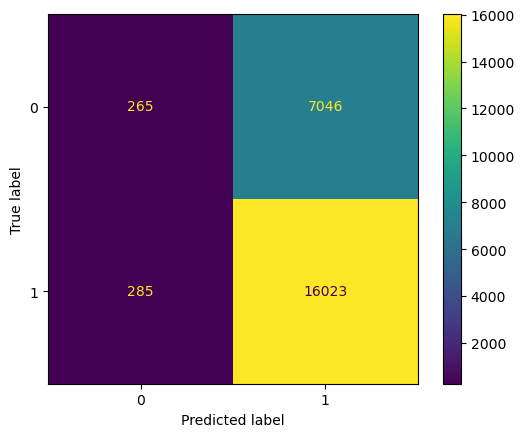

In [160]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [161]:
def PlotBoundaries(model, X, Y, dot_size=20, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=dot_size, edgecolor='k')
    plt.show()

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Visualize its results
PlotBoundaries(LR_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(X_train, y_train)}")

InvalidIndexError: (slice(None, None, None), 0)

## Natural Langauge Processing {#NLP}

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

Loading the dataset into a pandas dataframe with pd.read_csv()
then reducing it down to just the 'repair_status' and 'problem' columns

In [51]:
ldf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ldf = ldf[['repair_status', 'problem']]
ldf

,repair_status,problem
0,End of life,Pumpe defekt
1,Repairable,Akku lädt nicht
2,Fixed,Ohne Funktion
3,End of life,Netzteilbuchse und Grafikkarte defekt
4,End of life,Getriebeschaden
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


looking for total "na" values in 'repair_status' column with .isna().sum() - found 0

In [52]:
ldf['repair_status'].isna().sum()

0

looking for total "na" values in 'problem' column using .isna().sum() - found 15,045

In [57]:
ldf['problem'].isna().sum()

0

replace all "Na" values with "blank"

In [56]:
ldf = ldf.fillna('blank')

use .drop to remove all rows with "Unknown" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [58]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Unknown'].index)
ldf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

use .drop to remove all rows with "Repairable" in the 'repair_status' column to simplify modeling
and check to see that it took effect

In [59]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Repairable'].index)
ldf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

use .loc to find all rows with "Fixed" in the 'repair_status' column

In [60]:
fixed_df = ldf.loc[ldf['repair_status'] == 'Fixed']
fixed_df

,repair_status,problem
2,Fixed,Ohne Funktion
10,Fixed,Softwareproblem
11,Fixed,Klappe klemmt
12,Fixed,ohne Funktion
13,Fixed,Schalter defekt
...,...,...
103063,Fixed,Dab radiodoesn't switch on.
103071,Fixed,Extension cable for PAT testing.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


choosing a random sample of 1000 rows to make processing faster

In [61]:
simple_data_f = fixed_df.sample(n=1000, random_state=1)
simple_data_f

,repair_status,problem
37832,Fixed,brandt nt peertje kapot alles doorgemeten en m...
29129,Fixed,DVD schijfje komt er niet uit - snaar snaar v...
36257,Fixed,Na half uurtje draaien komt er rook uit de mot...
14313,Fixed,needs to be put back together loose parts put ...
69024,Fixed,Broken Screen
...,...,...
39824,Fixed,kabelbreuk
52932,Fixed,Op toestel bevindt zich een schermpje(zie foto...
45527,Fixed,Hapert Filters vervuild Filters schoongemaakt
21943,Fixed,Not working Faulty battery


tokenizing the text data using str.split() to create lists of words from every sentence

In [62]:
simple_data_f['problem'].str.split(' ')

37832    [brandt, nt, peertje, kapot, alles, doorgemete...
29129    [DVD, schijfje, komt, er, niet, uit, -, snaar,...
36257    [Na, half, uurtje, draaien, komt, er, rook, ui...
14313    [needs, to, be, put, back, together, loose, pa...
69024                                     [Broken, Screen]
                               ...                        
39824                                         [kabelbreuk]
52932    [Op, toestel, bevindt, zich, een, schermpje(zi...
45527    [Hapert, Filters, vervuild, Filters, schoongem...
21943                      [Not, working, Faulty, battery]
79529    [Cosses, de, l’interrupteur, oxydées,, réparat...
Name: problem, Length: 1000, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bagofwords = CountVectorizer()

bagofwords.fit(simple_data_f['problem'])

small_transformed = bagofwords.transform(simple_data_f['problem'])
small_transformed

<1000x2777 sparse matrix of type '<class 'numpy.int64'>'
	with 6846 stored elements in Compressed Sparse Row format>

In [65]:
bagofwords.get_feature_names_out()

array(['10', '100', '11', ..., 'überbrücken', 'überbrückt', 'überprüft'],
      dtype=object)

In [66]:
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# add more features
# more markdown
# multiple models
# hyperparameter tuning


In [67]:
df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(df)

,10,100,11,110gr,12,12v,145,146,17,2020,...,één,éénmaal,être,öffnen,ölen,ønstalleerd,über,überbrücken,überbrückt,überprüft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## NLP ROUND 2

dividing the data between train and test sections using sklearn's train_test_split 

In [126]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [92]:
ndf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ndf = ndf[['repair_status', 'problem']]
ndf

,repair_status,problem
0,End of life,Pumpe defekt
1,Repairable,Akku lädt nicht
2,Fixed,Ohne Funktion
3,End of life,Netzteilbuchse und Grafikkarte defekt
4,End of life,Getriebeschaden
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


In [98]:
ndf = ndf.fillna('blank')

In [99]:
X = ndf['problem']
y = ndf['repair_status']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
X_train.shape

(69060,)

In [102]:
bagofwords = CountVectorizer()

bagofwords.fit (X_train)

X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<69060x37257 sparse matrix of type '<class 'numpy.int64'>'
	with 502197 stored elements in Compressed Sparse Row format>

In [103]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 1000, round(1000/10))

samples = [words[i] for i in some_indices]
print(samples)

['000', '110volt', '15mins', '1n4007', '24cm', '352', '4c', '61', '85awasserleitungszufuhr', 'aandrijfsnoertje']


In [104]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,000,110volt,15mins,1n4007,24cm,352,4c,61,85awasserleitungszufuhr,aandrijfsnoertje
total_corpus_count,1,2,1,1,1,1,1,2,1,1


In [105]:
len(bagofwords.get_feature_names_out())

37257

In [106]:
X_train_transformed.toarray().sum(axis=0)

array([6, 1, 1, ..., 1, 1, 2], dtype=int64)

bar graph of the Top 20 most frequently occurring words

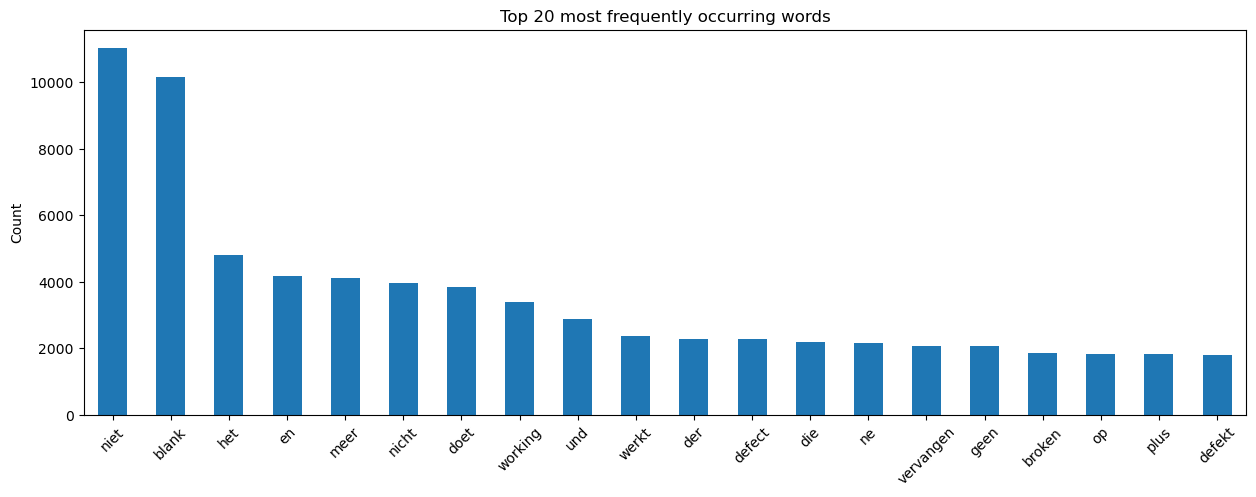

In [127]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

removing English stop words

In [128]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(69060, 36997)

bar graph of the Top 20 most frequently occurring words

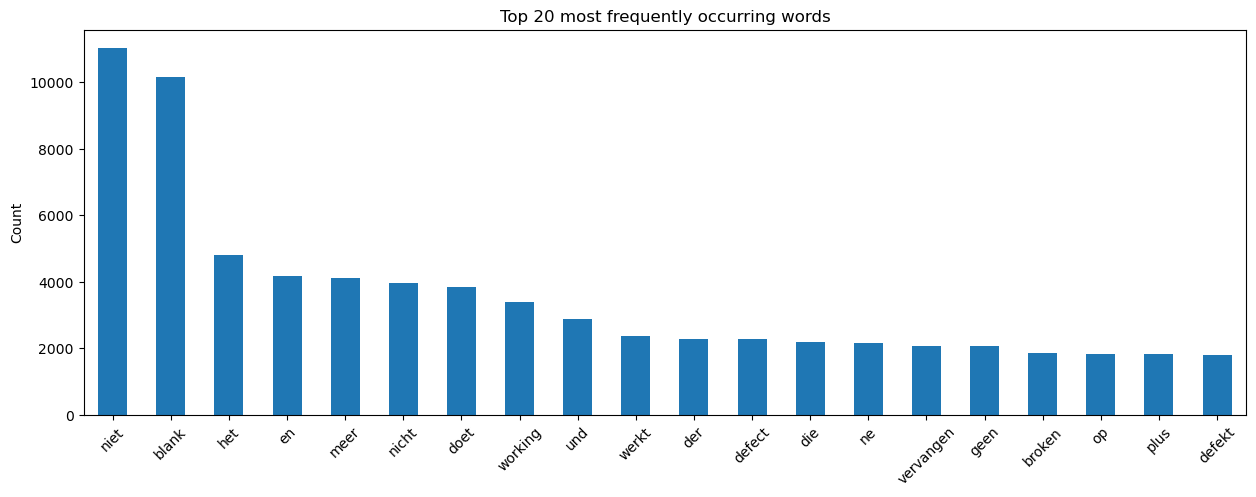

In [129]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [111]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<34016x36997 sparse matrix of type '<class 'numpy.int64'>'
	with 211298 stored elements in Compressed Sparse Row format>

In [116]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 36997, round(36997/100))

samples = [words[i] for i in some_indices]
print(samples)

['000', '220', '70', 'abdichten', 'activer', 'akkoord', 'angeboten', 'appartaat', 'aufheizungsstellen', 'außenuhr', 'bassausgang', 'bekannte', 'beule', 'blockiertdrehkoachsen', 'branchement', 'burned', 'cassettedoesn', 'chuté', 'componant', 'controller', 'custyomer', 'defektes', 'dew', 'disponible', 'draaiende', 'durchgängen', 'e10', 'einschaltimpuls', 'enclencher', 'erhältlich', 'example', 'faultes', 'finding', 'foodprocessor', 'funktionkontakte', 'gecontroleerd', 'gemeinsamen', 'gestagneerd', 'goes', 'haarschneidemaschine', 'heitelement', 'hjapert', 'idde', 'ingesmeerd', 'internetverbinding', 'joy', 'ken', 'knethaken', 'koolstoffilter', 'laadde', 'lautsprechers', 'lichtblitz', 'loquet', 'magentic', 'mearly', 'mid', 'montagepunt', 'naaigaren', 'netzfilter', 'noticeable', 'omega', 'opgegeten', 'outputs', 'partiellement', 'pick', 'pocos', 'presenter', 'provisoire', 'radiowecker', 'recognising', 'rekstrook', 'resets', 'ritdisplay', 'réduction', 'schaalwijzer', 'schnürre', 'segni', 'shut'

In [117]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))
display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,000,220,70,abdichten,activer,akkoord,angeboten,appartaat,aufheizungsstellen,außenuhr,...,vanop,vergleich,versnellingskabel,vindbaar,vorgefunden,wandlampe,weile,wirkung,zeige,zuverlässige
total_corpus_count,1,15,11,1,5,1,2,1,1,1,...,1,1,1,4,1,1,11,1,1,1


In [118]:
len(bagofwords.get_feature_names_out())

36997

In [119]:
X_train_transformed.toarray().sum(axis=0)

array([6, 1, 1, ..., 1, 1, 2], dtype=int64)

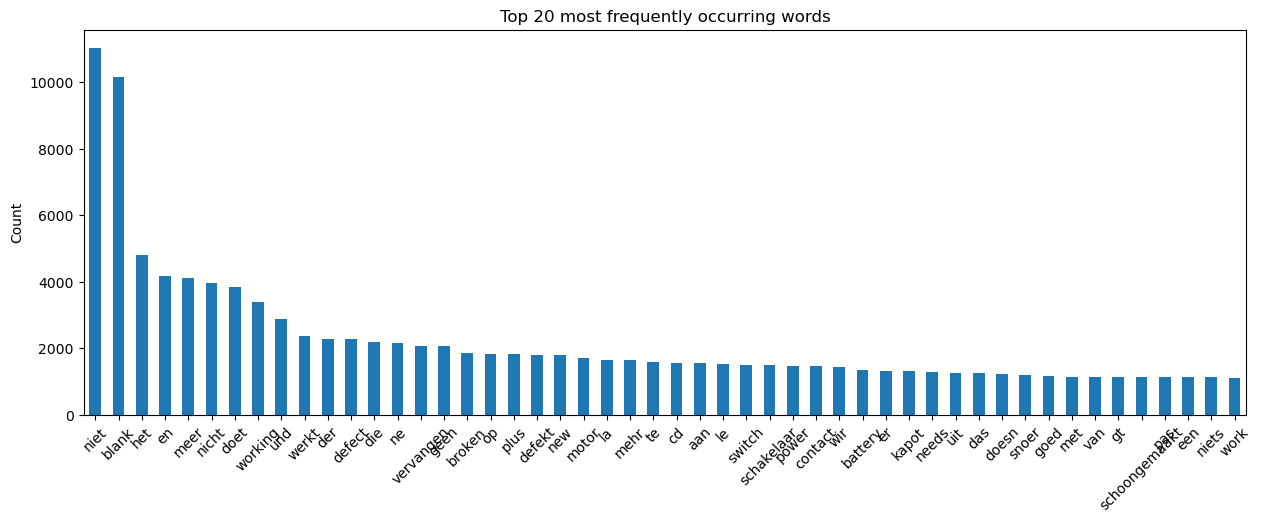

In [130]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [123]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7022444251375616
Test score: 0.6610124647224835


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [134]:

# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  87 2331]
 [ 102 5353]]
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      2418
           1       0.70      0.98      0.81      5455

    accuracy                           0.69      7873
   macro avg       0.58      0.51      0.44      7873
weighted avg       0.62      0.69      0.59      7873



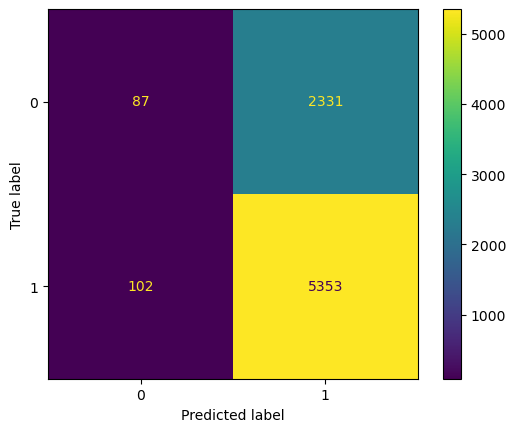

In [157]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()